In [57]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [59]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [60]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [61]:
# Impresión de las características
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.
- ¿En qué época del año hay más contaminación, y en cuál menos?
- ¿Qué centros tienen una mayor tendencia de crecimiento en los contaminantes?

## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

In [62]:
# Obtenemos una columna que nos dice el número de la semana dada la fecha
# Así no tarda tanto tiempo en ejecutar al graficarlo con respecto a la fecha
features["Date"] = pd.to_datetime(features["Date"])
features["week"] = features["Date"].dt.isocalendar().week

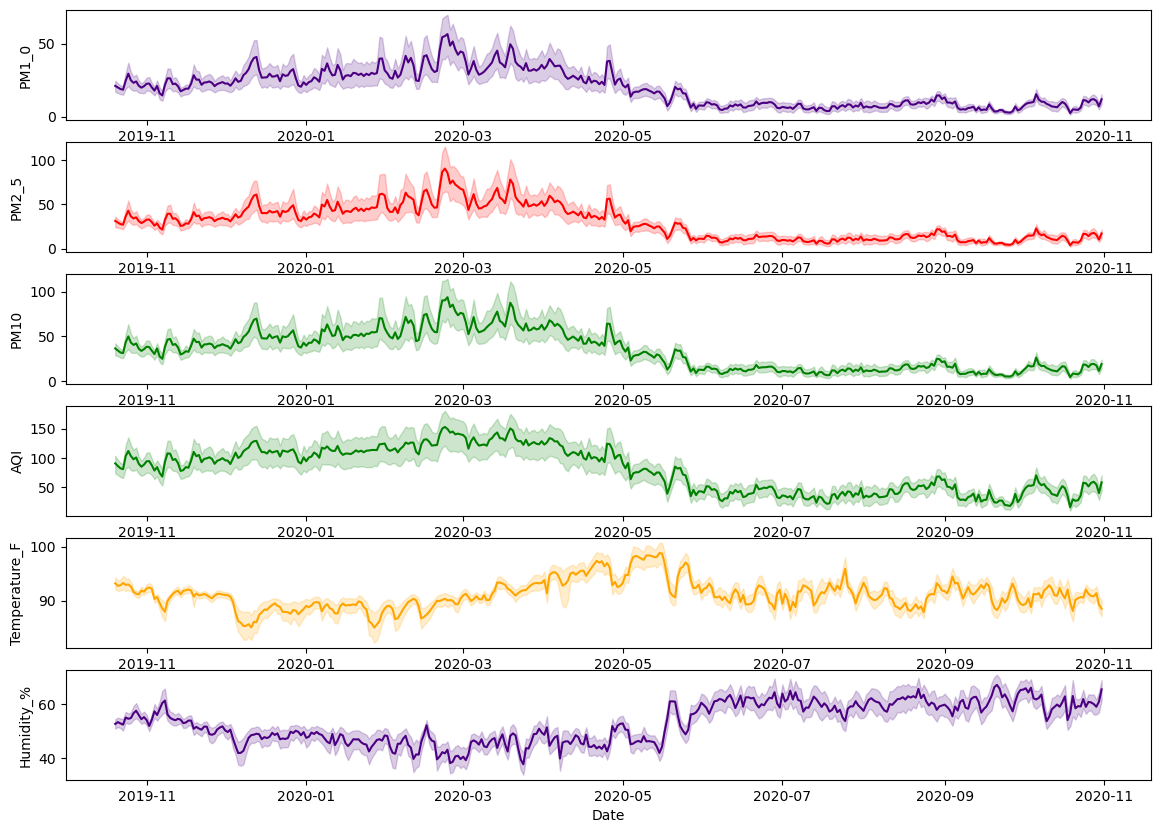

In [63]:
# Graficamos los contaminantes a lo largo del tiempo
fig, axs = plt.subplots(ncols=1, nrows= 6, figsize=(14, 10))

sns.lineplot(data=features, x="Date", y="PM1_0", color = "indigo", ax = axs[0])
sns.lineplot(data=features, x="Date", y="PM2_5", color = "red", ax = axs[1])
sns.lineplot(data=features, x="Date", y="PM10", color = "green", ax = axs[2])
sns.lineplot(data=features, x="Date", y="AQI", color = "green", ax = axs[3])
sns.lineplot(data=features, x="Date", y="Temperature_F", color = "orange", ax = axs[4])
sns.lineplot(data=features, x="Date", y="Humidity_%", color = "indigo", ax = axs[5])
plt.show()

<AxesSubplot:xlabel='Date', ylabel='value'>

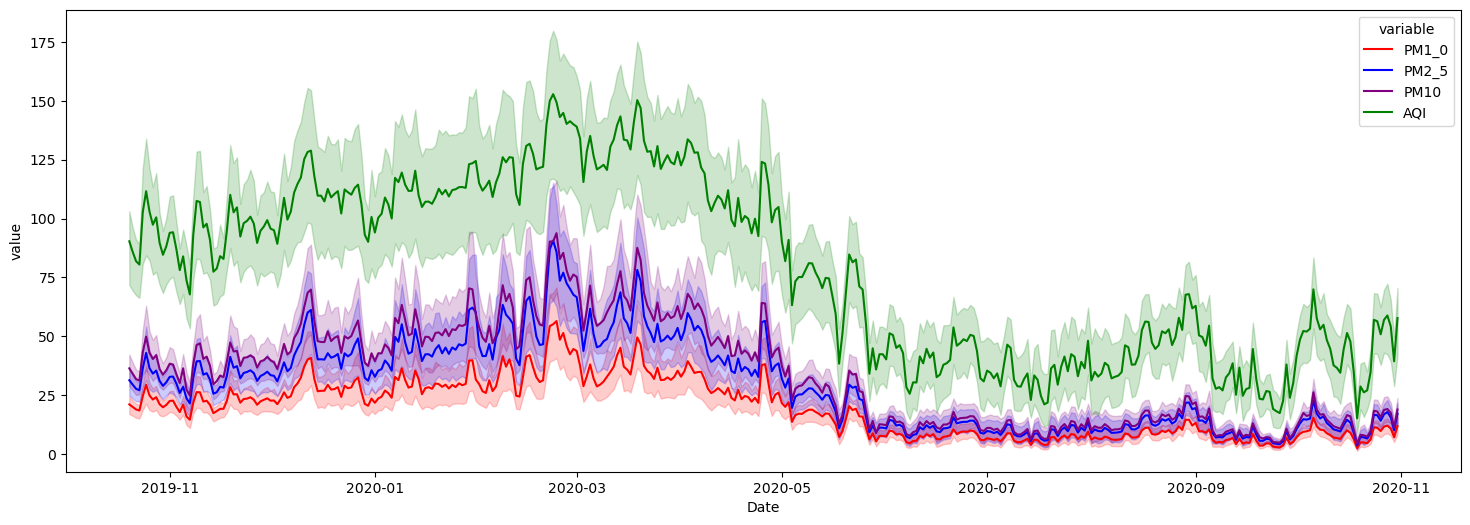

In [64]:
# Graficamos cómo se comportan las partículas PM y el AQI juntos
plt.figure(figsize=(18,6))

sns.lineplot(x = 'Date', y = 'value', hue = 'variable',
    data = pd.melt(features[['PM1_0', 'PM2_5', 'PM10', 'AQI', 'Date']], ['Date']),
    palette=['red', 'blue', 'purple', 'green'])

Podemos observar que las partículas PM y el AQI (índice de calidad del aire), están correlacionadas, por lo que, el AQI pódría represntar el comportamiento de estos 3 contaminantes por sí solo. 

Además, se puede observar ligeramente que la humedad y el AQI (como las otras partículas) están inversamente correlacionadas, por lo que, podría darnos una hipótesis de que a mayor porcentaje de humedad, menor contaminación.

Sin embargo, podemos notar que hay cierto ruido al graficar cada una de las características, y esto se puede deber a que por cada tiempo registrado, existen centros que registraron diferentes medidas, por lo que veremos cómo se comportan las medidas del AQI a lo largo del tiempo en los centros.

In [65]:
# Función que calcula la varianza cruzada
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    
    # CÓDIGO AQUI
    media_time1 = np.mean(time_series_1)
    media_time2 = np.mean(time_series_2)

    size = len(time_series_1)
    
    crossvariances = np.zeros(len(lags))
    for i, lag in enumerate(lags):
        sumxy = []
        for t in range(lag, size):
            sumxy.append(((time_series_2[t-lag] - media_time2) * (time_series_1[t] - media_time1)))

        crossvariances[i] =  np.mean(sumxy)
    return crossvariances

In [66]:
# Función que calcula la correalción cruzada
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
)-> float:
    
    media_time1 = np.mean(time_series_1)
    media_time2 = np.mean(time_series_2)

    size = len(time_series_1)
    
    if type(lags) == int:
        sumxy = []
        for t in range(lags, size):
            sumxy.append((time_series_2[t-lags] - media_time2) * (time_series_1[t] - media_time1))

        return np.mean(sumxy)
    else:
        crossvariances = np.zeros(len(lags))
        for i, lag in enumerate(lags):
            sumxy = []
            for t in range(lag, size):
                sumxy.append(((time_series_2[t-lag] - media_time2) * (time_series_1[t] - media_time1)))

            crossvariances[i] =  np.mean(sumxy)
        return crossvariances

In [67]:
# Función para normlalizar los datos de un dataframe
def normalize_array(arr):
    media = np.mean(arr)
    sd = np.std(arr)
    arr = (arr - media)/sd
    return arr

In [68]:
# Función que grafica correlogramas
def correlogram(df, name_series, name, lags, tit = ''):
    lags = range(0, lags)
    fig, axs = plt.subplots(ncols=len(name_series), figsize=(12, 3))
    fig.subplots_adjust(hspace=0.3, top=0.80)

    # Correlograma
    for i, col in enumerate(name_series):

        values = crosscorrelation(
            normalize_array(df[name].values), 
            normalize_array(df[col].values), lags)
        axs[i].stem(lags, values)
        axs[i].set_title(col)
        
    fig.suptitle(name + ' correlation ' + tit)
    plt.show()

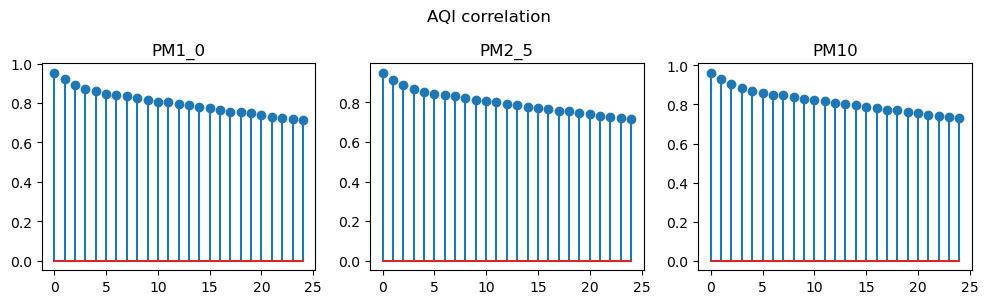

In [69]:
# Correlograma entre partículas PM y el AQI
correlogram(features, ["PM1_0", "PM2_5", "PM10"], "AQI", 25)

Como podemos observar, el AQI posee alta correlación con las partículas PM, hasta en para tiempos posteriores. Por lo que, para medir la calidad del aire ahora sólo ocuparemos esta columna.

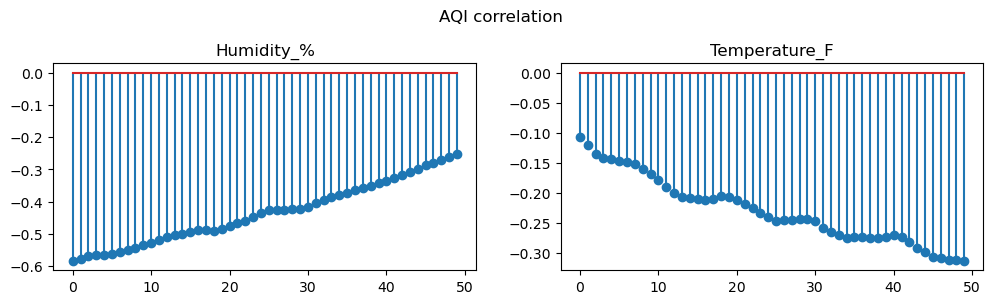

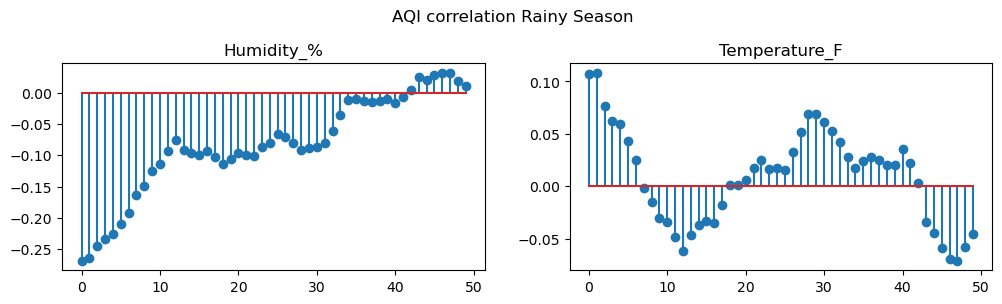

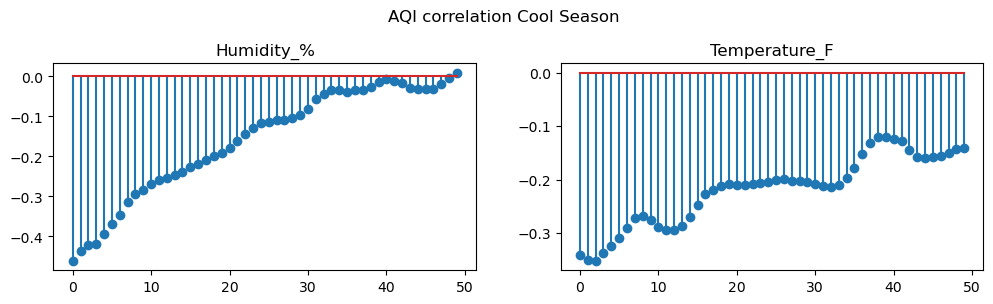

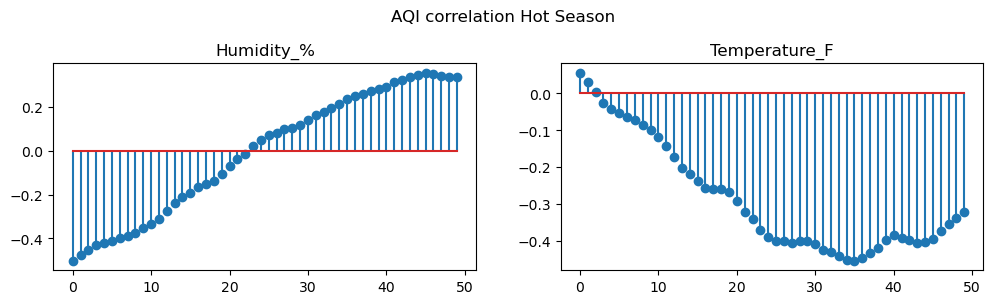

In [70]:
# Correlograma entre humedad y temperatura con el AQI
correlogram(features, ["Humidity_%", "Temperature_F"], "AQI", 50)

correlogram(features[features["Season"] == "Rainy Season"], ["Humidity_%", "Temperature_F"], "AQI", 50, "Rainy Season")

correlogram(features[features["Season"] == "Cool Season"], ["Humidity_%", "Temperature_F"], "AQI", 50,  "Cool Season")

correlogram(features[features["Season"] == "Hot Season"], ["Humidity_%", "Temperature_F"], "AQI", 50, "Hot Season")

Como se mencionó anteriormente, la **humedad** ahora viendo el correlograma si presenta una leve **correlación inversa** con respecto al **índice de contaminación**, esto se puede deber a que si llueve, la lluvia junto al aire "limpian" la atmósfera de contaminantes, siendo una consecuencia de la lluvia la alta humedad. Por lo que, con esta hipótesis podríamos decir que cuando hay días lluviosos, la contaminación disminuye y cuando no los hay, la contaminación aumenta.

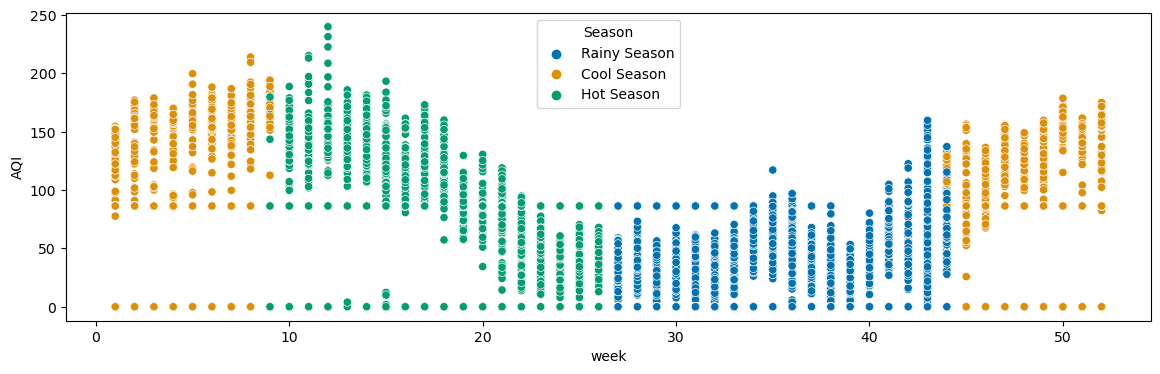

In [71]:
# Gráfico del comportamiento del AQI a lo largo de las temporadas
# del año (fue scatter porque lineplot conecta las series)
plt.figure(figsize=(14,4))
_ = sns.scatterplot(data=features, x = "week", y = "AQI", hue="Season", palette="colorblind")

Sin embargo, observamos que nuestra hipótesis a cerca de la temporada de lluvias es cierta, teniendo el pico más bajo del índice de contaminación a lo largo del año, sin ambargo, la temporada con mayor índice de contaminación es la de frío, de lugar de la de calor, como sea había hipotizado.

Además, existen datos anómalos a lo largo del año, veremos si se pueden corregir eliminando el ruido por Centro de medición. 

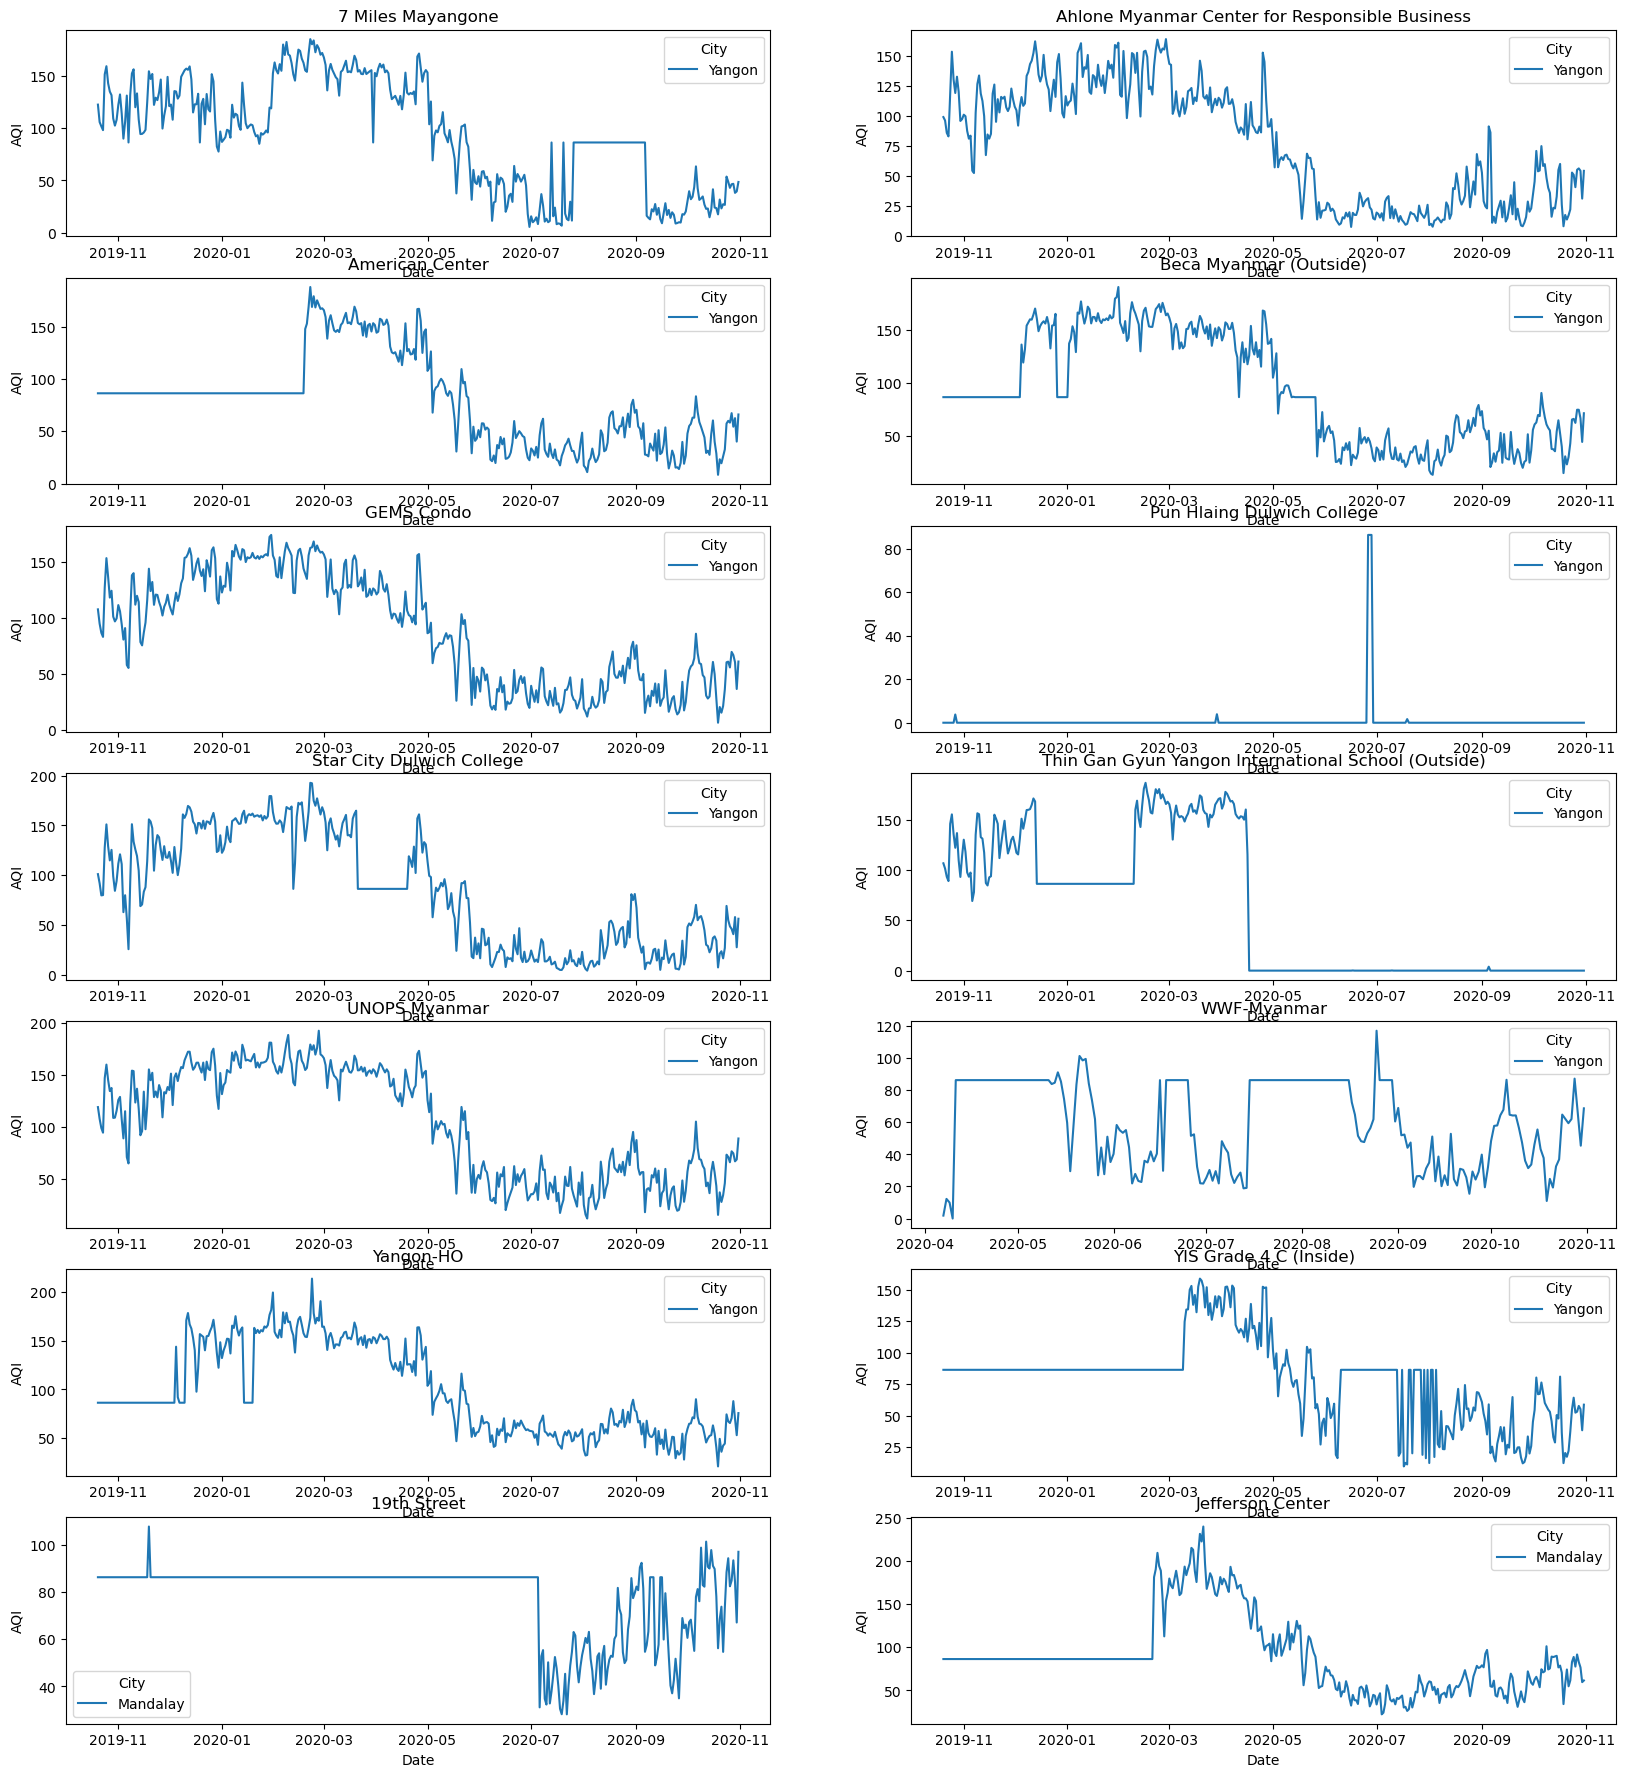

In [72]:
# Graficamos los datos de las mediciones por centro y Ciudad
centers = features["Center"].unique()
fig, axs = plt.subplots(ncols=2, nrows= 7, figsize=(20, 22))

for i, col in enumerate(centers):
    sns.lineplot(data = features[features["Center"] == col], 
        x = "Date", y="AQI", hue="City", ax = axs[i // 2, i % 2]).set(title=col)

Podemos observar que realmente existieron muchos datos anómalos a lo largo del año, algunos centros de medición sólo registraron datos una parte del año, como American Center y WWF_Myanmar, además vemos que de los 14 centros, sólo 1 no pertenece a la Ciudad de Yangon, si no a la ciudad de Mandalay, además este centro empezó a registrar hasta el Julio de 2020.

Además, parece ser que, cuando no hubo registros, los datos se reemplazaron por la media a lo largo del tiempo, esto lo podemos observar en '7 Miles ayangone' o 'Beca Myanmar'.

Por lo que, se considero que lo más conveniente es seguir en análisis sólo con los centros que poseen datos a lo largo de todo el año, ya que sería muy dificil corregir los datos anómalos de las mediciones de un centro sin saber cómo se comportaron en otros años, ya que como observamos en el gráfico por temporadas, cada año puede representar un ciclo de contaminación variando a lo largo de las temporadas del año.

Los centros con mejor registro de mediciones son:
- 7 Miles Mayangone
- Ahlone Myanmar Center for Responsible Business
- GEMS Condo
- UNOPS Myanmar

In [73]:
# Filtramos los datos de los centros
data_centers = features[
    (features["Center"] == '7 Miles Mayangone') |
    (features["Center"] == 'Ahlone Myanmar Center for Responsible Business') |
    (features["Center"] == 'GEMS Condo') |
    (features["Center"] == 'UNOPS Myanmar')
]

# Los centros elegidos
centers = data_centers["Center"].unique()

In [74]:
# Función para suavizar una serie de tiempo
def smooth_time_series(
    time_series: np.array,
    mask_size: int=2
) -> np.array:
    
    smooth_time_series = np.zeros(len(time_series))
    
    # CÓDIGO AQUÍ 
    size = len(time_series)

    for t in range(size):
        if t + 1 > mask_size and t + 1 + mask_size < size:
            smooth_time_series[t] = np.sum(time_series[t-mask_size:t+mask_size,])/mask_size*2
        else:
            smooth_time_series[t] = time_series[t]
    
    return smooth_time_series

In [75]:
# Suavizamos el AQI para observar un mejor comportamiento
data_centers["AQI_smt"] = smooth_time_series(data_centers["AQI"].values, 3)

C:\Users\Iván\AppData\Local\Temp\ipykernel_5400\2545392087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_centers["AQI_smt"] = smooth_time_series(data_centers["AQI"].values, 3)


El promedio de  7 Miles Mayangone es 377.099109347443
El promedio de  Ahlone Myanmar Center for Responsible Business es 306.20250440917124
El promedio de  GEMS Condo es 353.01832451499126
El promedio de  UNOPS Myanmar es 409.1975220458555


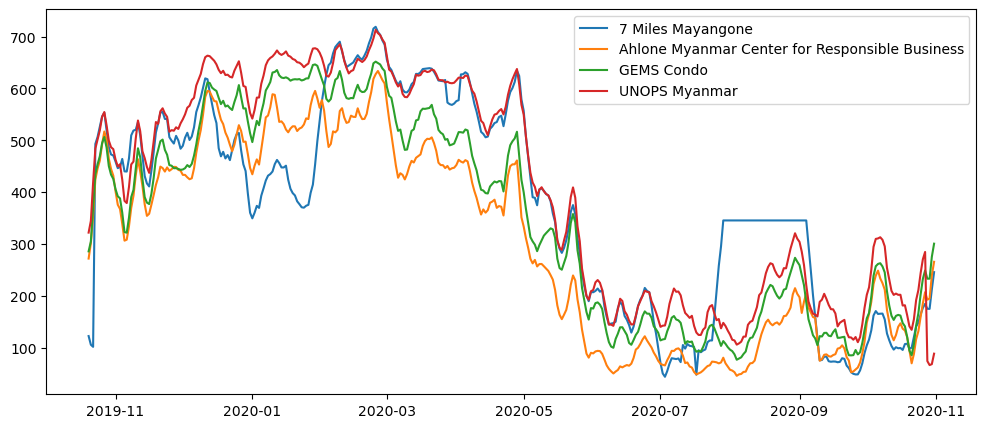

In [76]:
# Graficamos el AQI suavizado de los centros elegidos
plt.figure(figsize=(12,5))

for i, col in enumerate(centers):
    # Impormimos el promedio de AQI a lo largo del año
    print("El promedio de ", col, "es", data_centers[data_centers["Center"] == col]["AQI_smt"].mean())
    plt.plot(data_centers[data_centers["Center"] == col]["Date"], 
    data_centers[data_centers["Center"] == col]["AQI_smt"], 
    label = col, linestyle="-")
plt.legend()
plt.show()

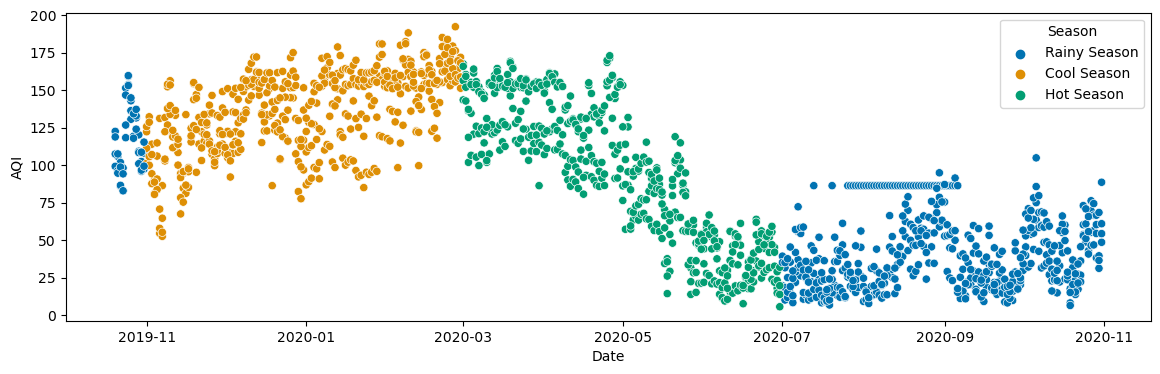

In [77]:
# Graficamos ahora sólo con los centros
plt.figure(figsize=(14,4))
_ = sns.scatterplot(data=data_centers, x = "Date", y = "AQI", hue="Season", palette="colorblind")

Con este gráfico, podemos observar 2 cosas, la primera es que el centro de medición (de los elegidos sin tantos datos anómalos) con **mayor índice de contaminación atmosférica** es UNOPS Myanmar, teniendo los otros centros a lo largo del año casi siempre abajo de su curva.

La segunda, es que si se reemplazaron los datos anómalos por el promedio, por ejemplo, hay datos anómalos en '7 Miles Mayangone' en agosto del 2020, pero  y estos claramente los reemplazaron por una constante, pudiendo ser su promedio.

Entonces: 
- ¿En qué época del año hay más contaminación, y en cuál menos?

Hay mayor índice de contaminación cuando está la época de frío, y hay un menor índice de contaminación cuando está la temporada de lluvias.

- ¿Qué centros tienen una mayor tendencia de crecimiento en los contaminantes?

El centro de medición 'UNOPS Myanmar' es el centro en promedio a lo largo del año con mayores reportes de índice de contaminación, teniendo en cuenta que se filtraron sólo los centros con grandes cantidades de datos servibles.